# Loading Motion Sensor Data into Pandas DataFrame

The following Python code imports necessary libraries and combines motion sensor data from multiple CSV files, storing it in a structured **Pandas DataFrame**. Subject-specific information, such as age, gender, height, and weight, is added to the dataset for comprehensive analysis.

## Steps:

1. **Imports the necessary libraries**:
   - `'os'` for file operations.
   - `'numpy'` as `'np'` for numerical operations.
   - `'pandas'` as `'pd'` for data handling.

2. **Specifies the path**:
   - Defines the path to the subject data file and the directory containing motion sensor data.

3. **Defines two functions**:
   - **`get_all_dataset_paths`**: Recursively walks through the specified directory and collects paths to all CSV files.
   - **`load_whole_dataframe_from_paths`**: Reads and combines motion sensor data from these paths into a single Pandas DataFrame. It also enriches the data with subject information from the subject data file.

4. **Loads the subject data**:
   - Loads the subject data from the CSV file `data_subjects_info.csv` into a Pandas DataFrame.

5. **Calls `get_all_dataset_paths`**:
   - Obtains a list of paths to all CSV files in the specified directory.

6. **Calls `load_whole_dataframe_from_paths`**:
   - Creates a comprehensive DataFrame containing motion sensor data, with additional subject information.

This code is a critical step in preparing motion sensor data for analysis and is commonly used in data science and machine learning projects involving motion data.


# Importing PYHTON Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from  sklearn.decomposition import  PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

# Loading Dataframe

In [4]:
DM_df = pd.read_csv('Desktop/iPhone6s/A_DeviceMotion_data/dws_1/sub_1.csv')
DM_df

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
1747,1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
1748,1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
1749,1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


In [5]:
AM_df = pd.read_csv('Desktop/iPhone6s/B_Accelerometer_data/dws_1/sub_1.csv')
AM_df

,Unnamed: 0,x,y,z
0,0,0.525208,0.584137,-0.381042
1,1,0.373001,0.577896,-0.201477
2,2,0.430847,0.844421,0.284988
3,3,0.217880,1.111359,0.381912
4,4,0.169601,0.977951,0.148376
...,...,...,...,...
1776,1776,0.719650,0.560974,0.220993
1777,1777,0.722565,0.558609,0.307068
1778,1778,0.732651,0.480606,0.309097
1779,1779,0.800400,0.495239,0.242950


In [6]:
Gyro_df = pd.read_csv('Desktop/iPhone6s/C_Gyroscope_data/dws_1/sub_1.csv')
Gyro_df

,Unnamed: 0,x,y,z
0,0,0.313564,0.818025,1.085387
1,1,0.838858,0.464291,0.646198
2,2,-0.141317,-0.000896,0.346186
3,3,-0.028178,-1.008873,0.038484
4,4,0.111079,-0.873046,0.049965
...,...,...,...,...
1746,1746,-0.126347,0.948978,-0.377044
1747,1747,-0.060777,0.762560,-0.435100
1748,1748,0.340102,1.036678,-0.335443
1749,1749,0.467008,1.267379,-0.329511


In [8]:
subject_data = pd.read_csv('Desktop/iPhone6s/data_subjects_info.csv')
subject_data

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0
3,4,90,176,31,1
4,5,48,164,23,0
5,6,76,180,28,1
6,7,62,175,30,0
7,8,52,161,24,0
8,9,93,190,32,1
9,10,72,164,31,0


# Normalizing and Scaling

In [73]:
subject_data.describe()

,code,weight,height,age,gender
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,72.125000,174.208333,28.791667,0.583333
std,7.071068,16.211409,8.900313,5.437224,0.503610
min,1.000000,48.000000,161.000000,18.000000,0.000000
25%,6.750000,60.000000,164.750000,25.000000,0.000000
50%,12.500000,71.000000,175.500000,28.000000,1.000000
75%,18.250000,80.500000,180.000000,31.250000,1.000000
max,24.000000,102.000000,190.000000,46.000000,1.000000


In [75]:
subject_data.info()
type(subject_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   code    24 non-null     int64
 1   weight  24 non-null     int64
 2   height  24 non-null     int64
 3   age     24 non-null     int64
 4   gender  24 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


pandas.core.frame.DataFrame

In [76]:
subject_data.isnull().sum()

code      0
weight    0
height    0
age       0
gender    0
dtype: int64

## DataFrame Manipulation

In this Python code, a copy of the original DataFrame **'data_frame'** is created. Subsequently, several columns are removed from the copied DataFrame **'df'** to streamline the dataset for further analysis. The columns removed are:

- `'Unnamed: 0'`
- `'subject_id'`
- `'session_id'`
- `'age'`
- `'gender'`
- `'height'`
- `'weight'`

This step simplifies the dataset by eliminating non-essential features, making it more focused and ready for analysis.


In [17]:
import os
import numpy as np
import pandas as pd

# change these following three lines only
subject_data_file = 'data_subjects_info.csv'
data_dir = '/Users/siddivinayaka/Desktop/iPhone6s/A_DeviceMotion_data'

os.chdir(data_dir)
os.chdir(os.pardir)

def get_all_dataset_paths(input_dir) -> []:
    input_files = []
    for dirs, subdirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.csv'):
                input_files.append(os.path.join(dirs, file))
    return input_files

def load_whole_dataframe_from_paths(paths, meta) -> pd.DataFrame:
    
    df = pd.DataFrame()

    for p in paths:
        c_dir, c_file = p.split('/')[-2], p.split('/')[-1]
        c_cat, c_ses = c_dir.split('_')[-2], c_dir.split('_')[-1]
        c_sub = c_file.split('_')[-1].split('.')[-2]
        
        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(c_sub))
        tdf = tdf.assign(session_id = int(c_ses))
        tdf = tdf.assign(category = str(c_cat))
        tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])
    
    df.reset_index(drop=True, inplace=True)
    return df

subject_data_frame = pd.DataFrame(pd.read_csv(subject_data_file, encoding = "utf-8"))
all_dataset_paths = get_all_dataset_paths(data_dir)
data_frame = load_whole_dataframe_from_paths(all_dataset_paths, subject_data_frame)

In [18]:
data_frame

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_id,session_id,category,age,gender,height,weight
0,0,-2.116381,-1.077507,-2.261502,-0.404768,0.880780,0.245713,-1.264215,-1.027909,-0.947909,0.282683,-0.254346,-0.407670,12,11,dws,33,1,167,60
1,1,-2.148154,-1.049759,-2.284278,-0.417081,0.867303,0.271686,-1.162024,-0.269118,-0.848823,0.256712,0.079154,-0.560291,12,11,dws,33,1,167,60
2,2,-2.153824,-1.026749,-2.297008,-0.432082,0.855621,0.284961,-0.665042,0.520170,-0.726722,0.253600,0.346680,-0.463275,12,11,dws,33,1,167,60
3,3,-2.142509,-1.012749,-2.290595,-0.445311,0.848291,0.286507,-0.079809,0.055322,-0.604534,0.411818,0.459372,-0.510293,12,11,dws,33,1,167,60
4,4,-2.130486,-1.007262,-2.274149,-0.452661,0.845372,0.283600,0.456097,-0.186877,-0.441315,0.311594,0.477305,-0.925049,12,11,dws,33,1,167,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,7019,1.529437,-1.490474,-1.584437,0.080167,0.996776,-0.003318,-0.085002,-0.429722,-0.069257,0.022524,-0.038265,0.065039,23,6,std,25,0,170,68
1412861,7020,1.551358,-1.491945,-1.554159,0.078755,0.996893,-0.001531,-0.135020,-0.400788,-0.068575,0.032589,-0.005148,0.003789,23,6,std,25,0,170,68
1412862,7021,1.586295,-1.493207,-1.511671,0.077503,0.996992,0.001201,-0.183880,-0.342070,-0.058310,-0.019428,-0.004850,-0.001918,23,6,std,25,0,170,68
1412863,7022,1.629579,-1.493814,-1.462520,0.076774,0.997038,0.004518,-0.189980,-0.255930,-0.024317,-0.030082,0.006120,-0.003267,23,6,std,25,0,170,68


In [19]:
df = data_frame.copy() #making a copy of original dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('subject_id', axis=1, inplace=True)
df.drop('session_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,category
0,-2.116381,-1.077507,-2.261502,-0.404768,0.880780,0.245713,-1.264215,-1.027909,-0.947909,0.282683,-0.254346,-0.407670,dws
1,-2.148154,-1.049759,-2.284278,-0.417081,0.867303,0.271686,-1.162024,-0.269118,-0.848823,0.256712,0.079154,-0.560291,dws
2,-2.153824,-1.026749,-2.297008,-0.432082,0.855621,0.284961,-0.665042,0.520170,-0.726722,0.253600,0.346680,-0.463275,dws
3,-2.142509,-1.012749,-2.290595,-0.445311,0.848291,0.286507,-0.079809,0.055322,-0.604534,0.411818,0.459372,-0.510293,dws
4,-2.130486,-1.007262,-2.274149,-0.452661,0.845372,0.283600,0.456097,-0.186877,-0.441315,0.311594,0.477305,-0.925049,dws
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,1.529437,-1.490474,-1.584437,0.080167,0.996776,-0.003318,-0.085002,-0.429722,-0.069257,0.022524,-0.038265,0.065039,std
1412861,1.551358,-1.491945,-1.554159,0.078755,0.996893,-0.001531,-0.135020,-0.400788,-0.068575,0.032589,-0.005148,0.003789,std
1412862,1.586295,-1.493207,-1.511671,0.077503,0.996992,0.001201,-0.183880,-0.342070,-0.058310,-0.019428,-0.004850,-0.001918,std
1412863,1.629579,-1.493814,-1.462520,0.076774,0.997038,0.004518,-0.189980,-0.255930,-0.024317,-0.030082,0.006120,-0.003267,std


 # Encoding Categorical Data for Machine Learning


The following Python code snippet utilizes the **'LabelEncoder'** from the scikit-learn library to transform the **'category'** column in the DataFrame **'df'** into numerical codes. These codes are stored in a new **'code'** column, and the original **'category'** column is subsequently removed from the DataFrame, preparing the data for machine learning tasks.

This transformation allows categorical data to be represented numerically, making it suitable for machine learning algorithms.


In [20]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
labels = lEncoder.fit(df.category)
df['code'] = lEncoder.transform(df.category)
df.drop('category', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code
0,-2.116381,-1.077507,-2.261502,-0.404768,0.880780,0.245713,-1.264215,-1.027909,-0.947909,0.282683,-0.254346,-0.407670,0
1,-2.148154,-1.049759,-2.284278,-0.417081,0.867303,0.271686,-1.162024,-0.269118,-0.848823,0.256712,0.079154,-0.560291,0
2,-2.153824,-1.026749,-2.297008,-0.432082,0.855621,0.284961,-0.665042,0.520170,-0.726722,0.253600,0.346680,-0.463275,0
3,-2.142509,-1.012749,-2.290595,-0.445311,0.848291,0.286507,-0.079809,0.055322,-0.604534,0.411818,0.459372,-0.510293,0
4,-2.130486,-1.007262,-2.274149,-0.452661,0.845372,0.283600,0.456097,-0.186877,-0.441315,0.311594,0.477305,-0.925049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,1.529437,-1.490474,-1.584437,0.080167,0.996776,-0.003318,-0.085002,-0.429722,-0.069257,0.022524,-0.038265,0.065039,3
1412861,1.551358,-1.491945,-1.554159,0.078755,0.996893,-0.001531,-0.135020,-0.400788,-0.068575,0.032589,-0.005148,0.003789,3
1412862,1.586295,-1.493207,-1.511671,0.077503,0.996992,0.001201,-0.183880,-0.342070,-0.058310,-0.019428,-0.004850,-0.001918,3
1412863,1.629579,-1.493814,-1.462520,0.076774,0.997038,0.004518,-0.189980,-0.255930,-0.024317,-0.030082,0.006120,-0.003267,3


# Visualizing the data

We use Seaborn and Matplotlib to create a countplot, visualizing the distribution of numerical codes in the 'code' column of the DataFrame 'df.' This plot provides insight into the frequency of different categories in the dataset.

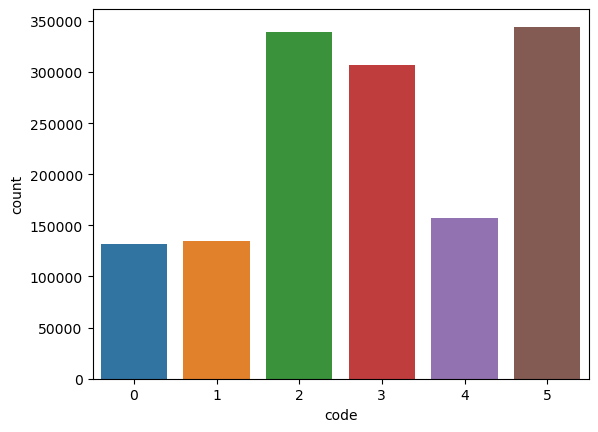

In [21]:
import seaborn as sns
import matplotlib.pylab as plt

sns.countplot(df, x='code')
plt.show()

## Splitting Data for Machine Learning

The following code uses the **'train_test_split'** function from **scikit-learn** to divide the dataset into **training** and **testing** sets. It separates the input features (**'x_columns'**) and the target variable (**'y_columns'**) with a 20% test set size, ensuring that the lengths of the training sets for both features and labels are the same, as asserted.

This is a critical step in preparing data for machine learning models, allowing for the evaluation of model performance on unseen data.


In [22]:
from sklearn.model_selection import train_test_split

x_columns = df.iloc[:, 0:12]
y_columns = df.iloc[:, 12:13]

trainx, testx, trainy, testy = train_test_split(x_columns, y_columns, test_size=0.2, shuffle=False)
assert(len(trainx) == len(trainy))

In [23]:
from scipy.stats import mode

WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

def sequence_generator(x, y, length, stride):
    seq_x = []
    seq_y = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        target_sequence = y.iloc[i : i + length]
        target_mode = mode(target_sequence.values)[0][0]
        seq_x.append(input_sequence)
        seq_y.append(target_mode)
    return np.array(seq_x), np.array(seq_y)

tx, ty = sequence_generator(trainx, trainy, WINDOW_LENGTH, STRIDE_LENGTH)
vx, vy = sequence_generator(testx, testy, WINDOW_LENGTH, STRIDE_LENGTH)

## Sequencing Data for Temporal Analysis

We define a sequence generator function that creates sequences of input features and corresponding target labels from the training and testing data. These sequences have a **window length** of 150 with a **stride** of 10. The **mode** of target labels within each sequence is calculated to represent the label for that sequence. 

This prepares the data for temporal analysis tasks, making it suitable for time-series or sequence-based models such as **LSTM** (Long Short-Term Memory) networks, which are designed to capture patterns over time.


In [24]:
from keras.utils import to_categorical

tty = to_categorical(ty, num_classes=NUM_CLASSES)
vvy = to_categorical(vy, num_classes=NUM_CLASSES)


## Defining LSTM-based Deep Learning Model

This code snippet utilizes the **Keras** library to build a deep learning model for sequence classification. The model is designed to process sequential data, which is common in time-series and motion-sensor tasks.

The architecture includes the following layers:

1. **LSTM Layer**:  
   The first layer is a Long Short-Term Memory (LSTM) layer with 6 units. LSTM is a type of **Recurrent Neural Network (RNN)** that excels at learning long-term dependencies in sequential data, which is essential for tasks where time is a critical factor, such as activity recognition. The `return_sequences=True` argument allows the LSTM to output a sequence, which is then flattened in the next step.

2. **Flatten Layer**:  
   After the LSTM layer, a **Flatten layer** is applied. This layer takes the 3D output from the LSTM (time steps, batch size, number of features) and flattens it into a 1D array that can be passed to the following fully connected layer.

3. **Dense Layer**:  
   This fully connected layer has 128 neurons and uses **ReLU** (Rectified Linear Unit) activation. ReLU is a popular activation function that helps the model learn non-linear relationships in the data, promoting sparsity in the activations and improving model performance.

4. **Output Layer**:  
   The output layer consists of `NUM_CLASSES` neurons, corresponding to the number of classes in the classification task. This layer uses the **Softmax activation** function, which transforms the output into a probability distribution over the classes, enabling multi-class classification.

5. **Model Compilation**:  
   The model is compiled using the following:
   - **Categorical Cross-Entropy Loss**: This is the standard loss function used for multi-class classification tasks where each label is represented as a one-hot encoded vector.
   - **Adam Optimizer**: Adam is an adaptive optimizer that combines the advantages of two other extensions of stochastic gradient descent: **AdaGrad** and **RMSProp**. It adapts the learning rate for each parameter and is known for converging faster.

Finally, a summary of the model architecture is displayed, showing the layer types, the number of parameters, and the shape of the outputs at each layer.

### Example Code for Model Definition:

```python
model = Sequential()
model.add(Input((WINDOW_LENGTH, NUM_FEATURES)))  # Input layer
model.add(LSTM(6, input_shape=(NUM_FEATURES, NUM_FEATURES), return_sequences=True))  # LSTM Layer
model.add(Flatten())  # Flatten Layer
model.add(Dense(128, activation='relu'))  # Dense Layer with ReLU
model.add(Dense(NUM_CLASSES, activation='softmax'))  # Output Layer with Softmax
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compilation
model.summary()  # Display model summary


In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Flatten
from keras.utils import to_categorical


model = Sequential()
model.add(Input((WINDOW_LENGTH, NUM_FEATURES)))
model.add(LSTM(6, input_shape=(NUM_FEATURES, NUM_FEATURES), return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150, 6)         │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 900)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       115,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,558 (455.30 KB)

 Trainable params: 116,558 (455.30 KB)

 Non-trainable params: 0 (0.00 B)

## Training the LSTM Model

This code snippet is responsible for training the previously defined **LSTM-based deep learning model**. It uses the training sequences `tx` (input features) and their corresponding one-hot encoded labels `tty` (target variable). The model is trained over a specified number of epochs (`EPOCHS_SIZE`) and batch size (`BATCH_SIZE`). The training progress and performance metrics are captured and stored in the `history` variable for later analysis.

### Key Parameters:
- **`EPOCHS_SIZE`**: The number of complete passes through the training data. Each epoch allows the model to learn and adjust weights based on the loss function.
- **`BATCH_SIZE`**: The number of samples processed before the model's internal parameters (weights) are updated. A smaller batch size might lead to better generalization, while a larger batch size can speed up training.
  
The model’s performance during training, such as accuracy and loss, is tracked through the **history object**. This object stores the values of the metrics at each epoch and can be used to visualize the model’s learning curve, assess overfitting or underfitting, and make adjustments as necessary.

### Example Code for Model Training:

```python
# Train the LSTM model
history = model.fit(tx, tty, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(vx, vty))


In [27]:
history = model.fit(tx, tty, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE)

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8388 - loss: 0.4774
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9695 - loss: 0.1007
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9812 - loss: 0.0633
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9862 - loss: 0.0440
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9886 - loss: 0.0337
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9921 - loss: 0.0246
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9938 - loss: 0.0188
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9951 - loss: 0.0147
Epoch 9/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9960 - loss: 0.0124
Epoch 10/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9965 - loss: 0.0103


## Evaluating the LSTM Model

After training the LSTM model, the next crucial step is to evaluate its performance on unseen data. This code snippet evaluates the trained **LSTM model** using the validation sequences `vx` (input features) and their corresponding one-hot encoded labels `vvy` (target variable). The evaluation is done with a specified batch size (`BATCH_SIZE`), and the model's performance metrics, such as loss and accuracy, are calculated and returned.

### Key Parameters:
- **`vx`**: The validation input data (sequences of features) that the model has not seen during training. This helps to assess how well the model generalizes.
- **`vvy`**: The one-hot encoded labels corresponding to the validation sequences. These are the true values against which the model's predictions are compared.
- **`BATCH_SIZE`**: The number of samples processed in a batch during the evaluation.

The evaluation metrics, typically **loss** and **accuracy**, are returned by the `evaluate` method. These metrics provide a quantitative measure of the model's ability to predict correctly on the validation data.

### Example Code for Model Evaluation:

```python
# Evaluate the LSTM model
evaluation_metrics = model.evaluate(vx, vvy, batch_size=BATCH_SIZE)

# Print the evaluation metrics (loss and accuracy)
print("Evaluation Metrics (Loss, Accuracy):", evaluation_metrics)


In [28]:
model.evaluate(vx, vvy, batch_size=BATCH_SIZE)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9926 - loss: 0.0298


[0.04150339588522911, 0.9896965622901917]

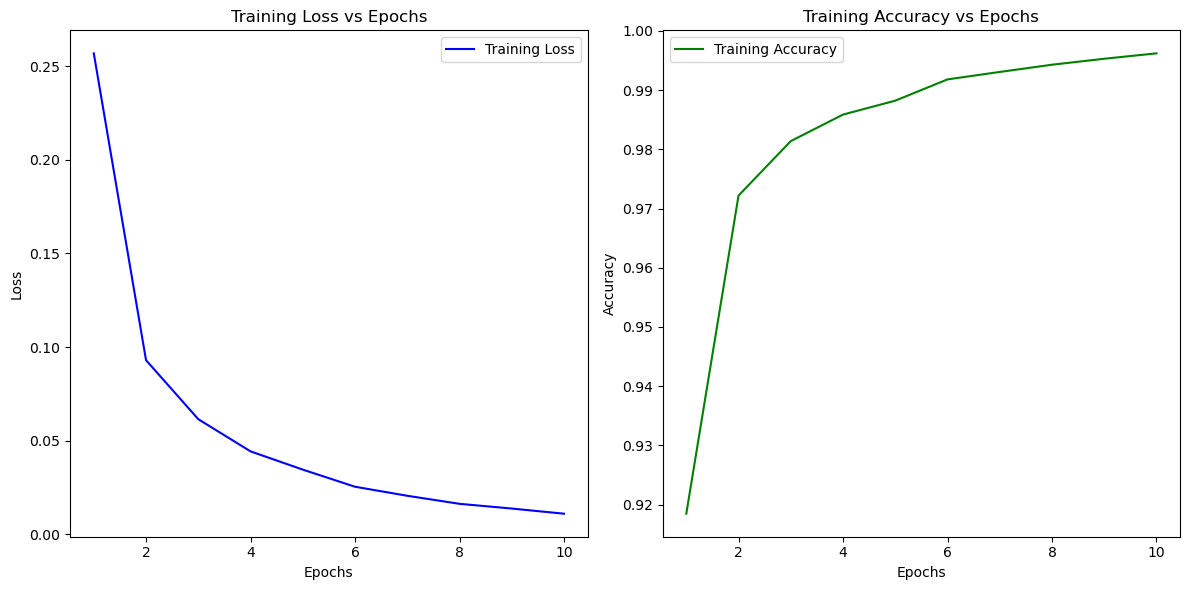

In [77]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from the history object
loss = history.history['loss']
accuracy = history.history['accuracy']

# Plot the training loss
plt.figure(figsize=(12, 6))

# Plot the loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Epochs')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


# Cross-Validation for Model Evaluation

Cross-validation is a powerful technique to assess the performance of a machine learning model by splitting the data into multiple subsets or "folds." In this case, **stratified cross-validation** is used to ensure that each fold contains a proportional distribution of classes. This approach is particularly useful for classification tasks, as it ensures that each fold has the same proportion of target classes as the overall dataset.

We perform **Stratified K-Fold Cross-Validation** using the `StratifiedKFold` method from scikit-learn. This method divides the data into `5` folds, trains the LSTM model on different train-test splits, and evaluates the model's performance on each fold.

### Key Steps in Cross-Validation:
1. **Stratified Split**: The data is divided into `5` folds, ensuring that each fold has a balanced representation of each class in the target variable.
2. **Model Training and Evaluation**: For each fold, the model is trained on the training data and evaluated on the corresponding test data.
3. **Accuracy Tracking**: The accuracy of the model on each test set is recorded in a list called `lst_accu_stratified` for further analysis.


In [29]:
from sklearn.model_selection import StratifiedKFold

NUM_SPLITS = 5

skf = StratifiedKFold(n_splits = NUM_SPLITS, shuffle=False)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x_columns, y_columns):
    x_train_fold, x_test_fold = x_columns.iloc[train_index], x_columns.iloc[test_index]
    y_train_fold, y_test_fold = y_columns.iloc[train_index], y_columns.iloc[test_index]
    
    tx, ty = sequence_generator(x_train_fold, y_train_fold, WINDOW_LENGTH, STRIDE_LENGTH)
    vx, vy = sequence_generator(x_test_fold, y_test_fold, WINDOW_LENGTH, STRIDE_LENGTH)

    tty = to_categorical(ty, num_classes = NUM_CLASSES)
    vvy = to_categorical(vy, num_classes = NUM_CLASSES)

    model.fit(tx, tty, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE)
    
    test_loss, test_accuracy = model.evaluate(vx, vvy)
    lst_accu_stratified.append(test_accuracy)

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9896 - loss: 0.0333
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9953 - loss: 0.0129
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9966 - loss: 0.0100
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9974 - loss: 0.0078
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9974 - loss: 0.0074
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9982 - loss: 0.0052
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9981 - loss: 0.0058
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9982 - loss: 0.0048
Epoch 9/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9987 - loss: 0.0040
Epoch 10/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9985 - loss: 0.0045
883/883 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9768 - loss: 0.2537
Epoch 1/10
1131/1131 ━━━

# Confusion matrix

883/883 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


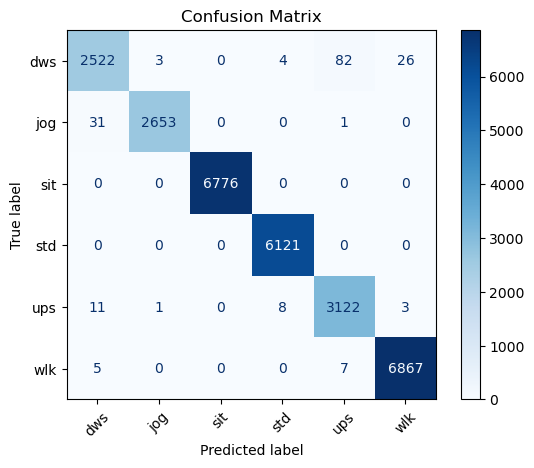

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions
y_pred_probs = model.predict(vx)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class labels

# True labels
y_true = np.argmax(vvy, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']  # Update these based on your actual category classes if different

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


# Analyzing Model Cross-Validation Results

Once the **Stratified K-Fold Cross-Validation** process is complete, it is essential to analyze the results to gain insights into the model's performance across different folds. The following code computes various statistics to assess the LSTM model’s performance, such as the **list of accuracy values**, **maximum accuracy**, **minimum accuracy**, **mean accuracy**, and the **standard deviation of accuracy**. These statistics provide an understanding of the model's stability and generalization ability.

### Key Statistics:
1. **List of Accuracy Values**: The accuracy achieved by the model on each fold's test set.
2. **Maximum Accuracy**: The highest accuracy achieved across all folds, representing the best-case scenario.
3. **Minimum Accuracy**: The lowest accuracy achieved across all folds, which can indicate the worst-case performance.
4. **Overall (Mean) Accuracy**: The average accuracy across all folds, providing a general estimate of the model's performance.
5. **Standard Deviation of Accuracy**: A measure of the variability of the accuracy across the folds. A high standard deviation suggests that the model's performance varies greatly across different subsets of the data.


In [31]:
from statistics import stdev, mean

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified))
print('\nMinimum Accuracy:', min(lst_accu_stratified))
print('\nOverall Accuracy:', mean(lst_accu_stratified))
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9598130583763123, 0.984173059463501, 0.9776227474212646, 0.9934850931167603, 0.9935559034347534]

Maximum Accuracy That can be obtained from this model is: 0.9935559034347534

Minimum Accuracy: 0.9598130583763123

Overall Accuracy: 0.9817299723625184

Standard Deviation is: 0.013975197669906713


In [34]:
import numpy as np

# List of fold-wise accuracy values from cross-validation
accuracy_list = [0.9598130583763123, 0.984173059463501, 0.9776227474212646, 
                 0.9934850931167603, 0.9935559034347534]

# Convert to NumPy array
acc_array = np.array(accuracy_list)

# Compute statistics
max_acc = np.max(acc_array)
min_acc = np.min(acc_array)
mean_acc = np.mean(acc_array)
std_acc = np.std(acc_array)

# Display the results
print(f"List of Accuracies per Fold: {accuracy_list}")
print(f"\n📈 Maximum Accuracy Achieved: {max_acc:.4f}")
print(f"📉 Minimum Accuracy Achieved: {min_acc:.4f}")
print(f"📊 Overall (Mean) Accuracy: {mean_acc:.4f}")
print(f"📐 Standard Deviation: {std_acc:.4f}")


List of Accuracies per Fold: [0.9598130583763123, 0.984173059463501, 0.9776227474212646, 0.9934850931167603, 0.9935559034347534]

📈 Maximum Accuracy Achieved: 0.9936
📉 Minimum Accuracy Achieved: 0.9598
📊 Overall (Mean) Accuracy: 0.9817
📐 Standard Deviation: 0.0125


# List of Accuracies per Fold: 

[0.9598130583763123, 0.984173059463501, 0.9776227474212646, 0.9934850931167603, 0.9935559034347534]

📈 Maximum Accuracy Achieved: 0.9936
📉 Minimum Accuracy Achieved: 0.9598
📊 Overall (Mean) Accuracy: 0.9817
📐 Standard Deviation: 0.0125


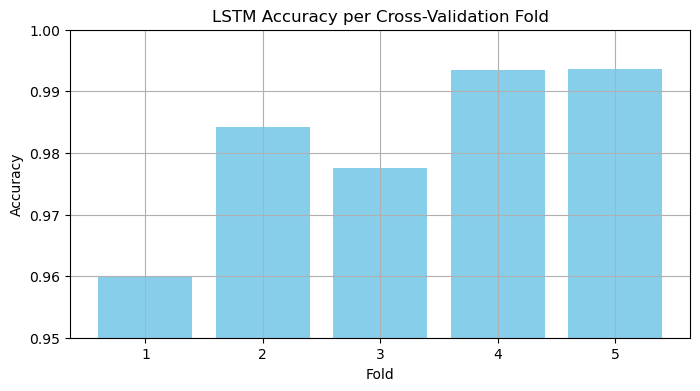

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(accuracy_list)+1), accuracy_list, color='skyblue')
plt.title('LSTM Accuracy per Cross-Validation Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1.0)
plt.grid(True)
plt.show()


In [106]:
import joblib


joblib.dump(model, 'lstm_model.pkl')


print("Models saved successfully!")

Models saved successfully!


In [107]:
import joblib

model = joblib.load('lstm_model.pkl')

In [108]:
model